In [1]:
import torch

In [5]:
import pickle  #오염된 이미지 파일을 로딩하는 라이브러리

In [6]:
import matplotlib.pyplot as plt


In [39]:
broken_image = torch.FloatTensor(pickle.load(open('broken_image_t.p', 'rb'),encoding ='latin1'))

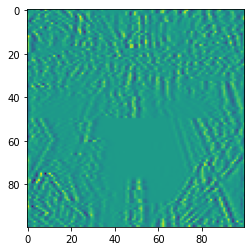

In [40]:
plt.imshow(broken_image.view(100,100))

In [41]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [42]:
def distance_loss(hypothesis, broken_image):
  return torch.dist(hypothesis, broken_image)  #dist는 두 텐서 사이의 거리를 구하는 함수 


In [43]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [ ]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))
plt.imshow(random_tensor.view(100,100).data)

Loss at 0 = 0.24258336424827576
Loss at 1000 = 0.20844335854053497
Loss at 2000 = 0.18139204382896423
Loss at 3000 = 0.15841910243034363
Loss at 4000 = 0.13801416754722595
Loss at 5000 = 0.11933878064155579
Loss at 6000 = 0.10188812762498856
Loss at 7000 = 0.08533897995948792
Loss at 8000 = 0.06947525590658188
Loss at 9000 = 0.0541459321975708
Loss at 10000 = 0.039244432002305984
Loss at 11000 = 0.024696514010429382
Loss at 12000 = 0.021161166951060295
Loss at 13000 = 0.02116650715470314
Loss at 14000 = 0.021167514845728874
Loss at 15000 = 0.021168364211916924
Loss at 16000 = 0.021168634295463562
Loss at 17000 = 0.021168628707528114
Loss at 18000 = 0.02117040753364563
